<a href="https://colab.research.google.com/github/Lav168/PRODIGY_DS_01/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

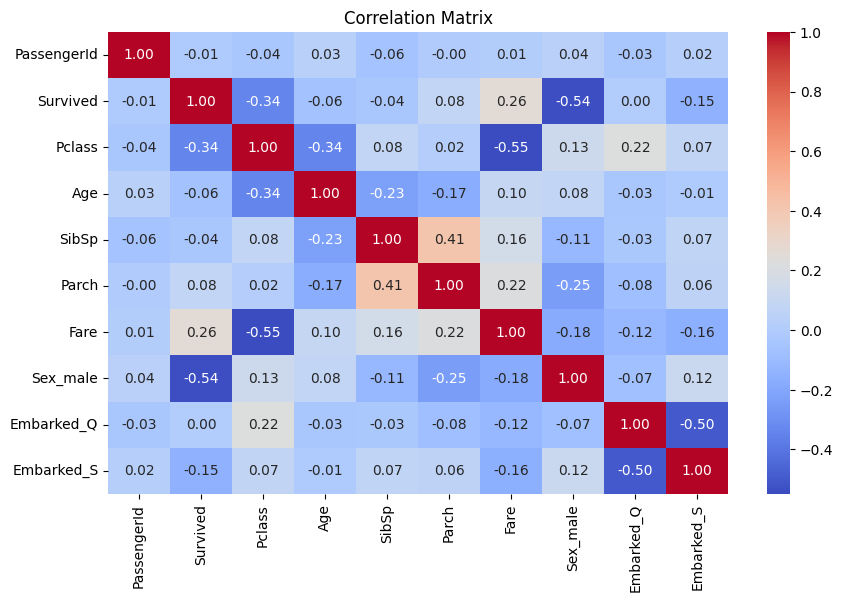

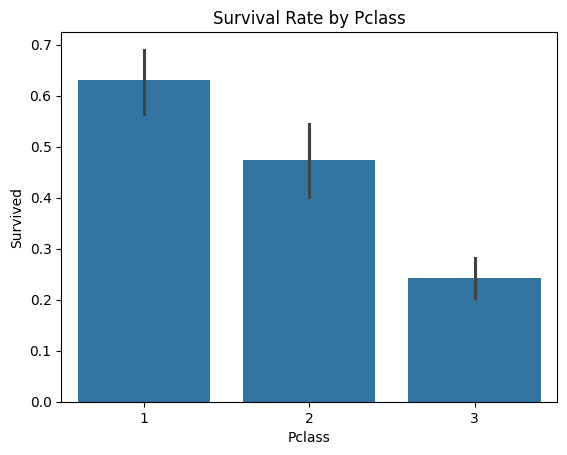

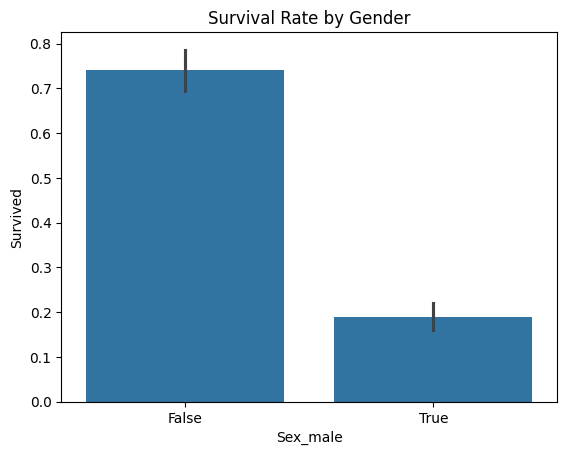

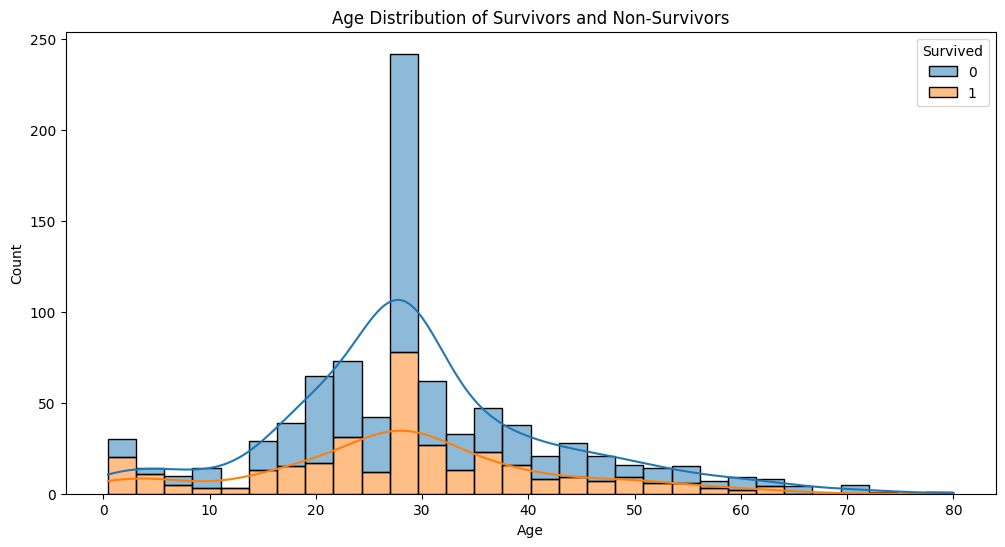

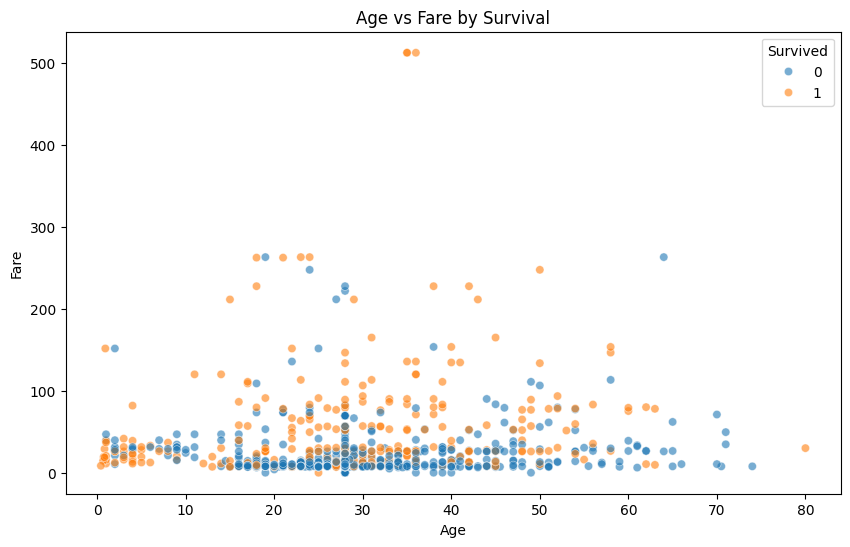

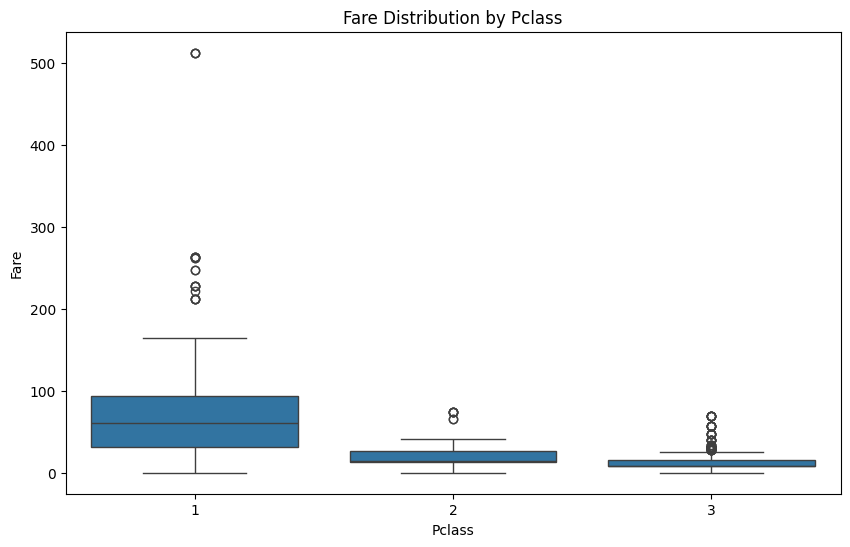

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
gender_data = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')

print(train_data.head())
print(train_data.info())
print(train_data.describe())

missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

train_data.loc[:, 'Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data.loc[:, 'Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data.drop('Cabin', axis=1, inplace=True)

train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass')
plt.show()

sns.barplot(x='Sex_male', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data, alpha=0.6)
plt.title('Age vs Fare by Survival')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Distribution by Pclass')
plt.show()
